In [3]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

Inserire un colore tra Greys, Blues, Oranges o Greens: Blues


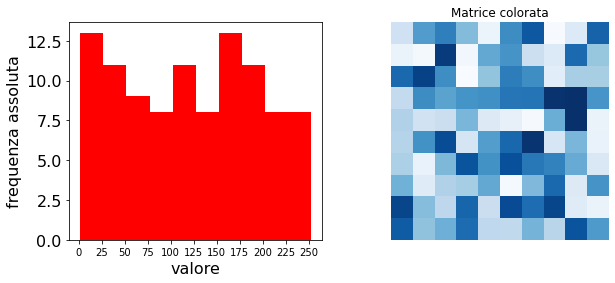

In [30]:
mat=np.random.randint(0,256,size=(10,10))
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].hist(mat.ravel(), color="r")
axs[0].set_xlabel("valore", fontsize=16)
axs[0].set_ylabel("frequenza assoluta", fontsize=16)
axs[0].set_xticks(range(0,256,25))
axs[0].tick_params(axis="x", labelsize=10)
axs[0].tick_params(axis="y", labelsize=16)

col=input("Inserire un colore tra Greys, Blues, Oranges o Greens: ")
axs[1].imshow(mat, cmap=col)
axs[1].set_title("Matrice colorata")
axs[1].axis("off")
plt.show()

Cerca su Internet gli open data relativi ai dati storici dei laureati in Italia registrati dal MIUR. Scarica questi dati in formato csv e utilizza pandas per: ›› caricare i dati di ciascun csv all’intero di un dataframe; 
›› creare un’aggregazione del numero di laureati per ateneo; 
›› creare un’aggregazione del numero di laureati per residenza; 
›› creare un’aggregazione del numero di laureati per sesso; 
›› creare un’aggregazione del numero di laureati per tipo di laurea; 
›› creare un’aggregazione del numero di laureati per sesso e per tipo di laurea. 
Usando sia le funzioni di matplot che quelle di pandas: 
- disegna una figura con 2 grafici che mettano in relazione il sesso con il tipo di laurea e il sesso con la residenza. 
- disegna il grafico che meglio esprime la distribuzione degli iscritti ai vari atenei 
- disegna il grafico che meglio esprime la tendenza del numero di iscritti all'università negli anni per i maschi e per le femmine

In [4]:
lauxate = pd.read_csv("laureatixateneo.csv")
lauxres = pd.read_csv("laureatixresidenza.csv")
lauxtco = pd.read_csv("laureatixtipocorso.csv")

#lauxate[["AteneoNOME","Lau"]].groupby("AteneoNOME").sum()
#lauxate.head()
lauxres.head()
#lauxtco.head()

,AnnoS,IstatP,ResidenzaP,SESSO,Lau
0,2020,1,TORINO,F,6512
1,2020,1,TORINO,M,5357
2,2020,2,VERCELLI,F,410
3,2020,2,VERCELLI,M,305
4,2020,3,NOVARA,F,1028


In [33]:
lauxres[["ResidenzaP","Lau"]].groupby("ResidenzaP").sum()

,Lau
ResidenzaP,
AGRIGENTO,28481
ALESSANDRIA,17756
ANCONA,29353
AOSTA,6386
AREZZO,17523
...,...
VERCELLI,7625
VERONA,48705
VIBO VALENTIA,11218


In [34]:
lauxres[["SESSO","Lau"]].groupby("SESSO").sum()

,Lau
SESSO,
F,2005139
M,1445008


In [35]:
lauxtco[["CorsoTIPO","SESSO","Lau"]].groupby(["CorsoTIPO","SESSO"]).sum()

Lau
CorsoTIPO                                      SESSO        
Corsi di Laurea - vecchio ordinamento          F       58172
                                               M       21869
Laurea  - dm 509/99                            F      320063
                                               M      233440
Laurea - dm 270/04                             F      815910
                                               M      598448
Laurea Magistrale - dm 270/04                  F      484338
                                               M      369600
Laurea Magistrale a Ciclo Unico - dm 270/04    F      180972
                                               M      111632
Laurea Specialistica - dm 509/99               F       91285
                                               M       76919
Laurea Specialistica a Ciclo Unico - dm 509/99 F       54400
                                               M       33102

- disegna una figura con 2 grafici che mettano in relazione il sesso con il tipo di laurea e il sesso con la residenza. 

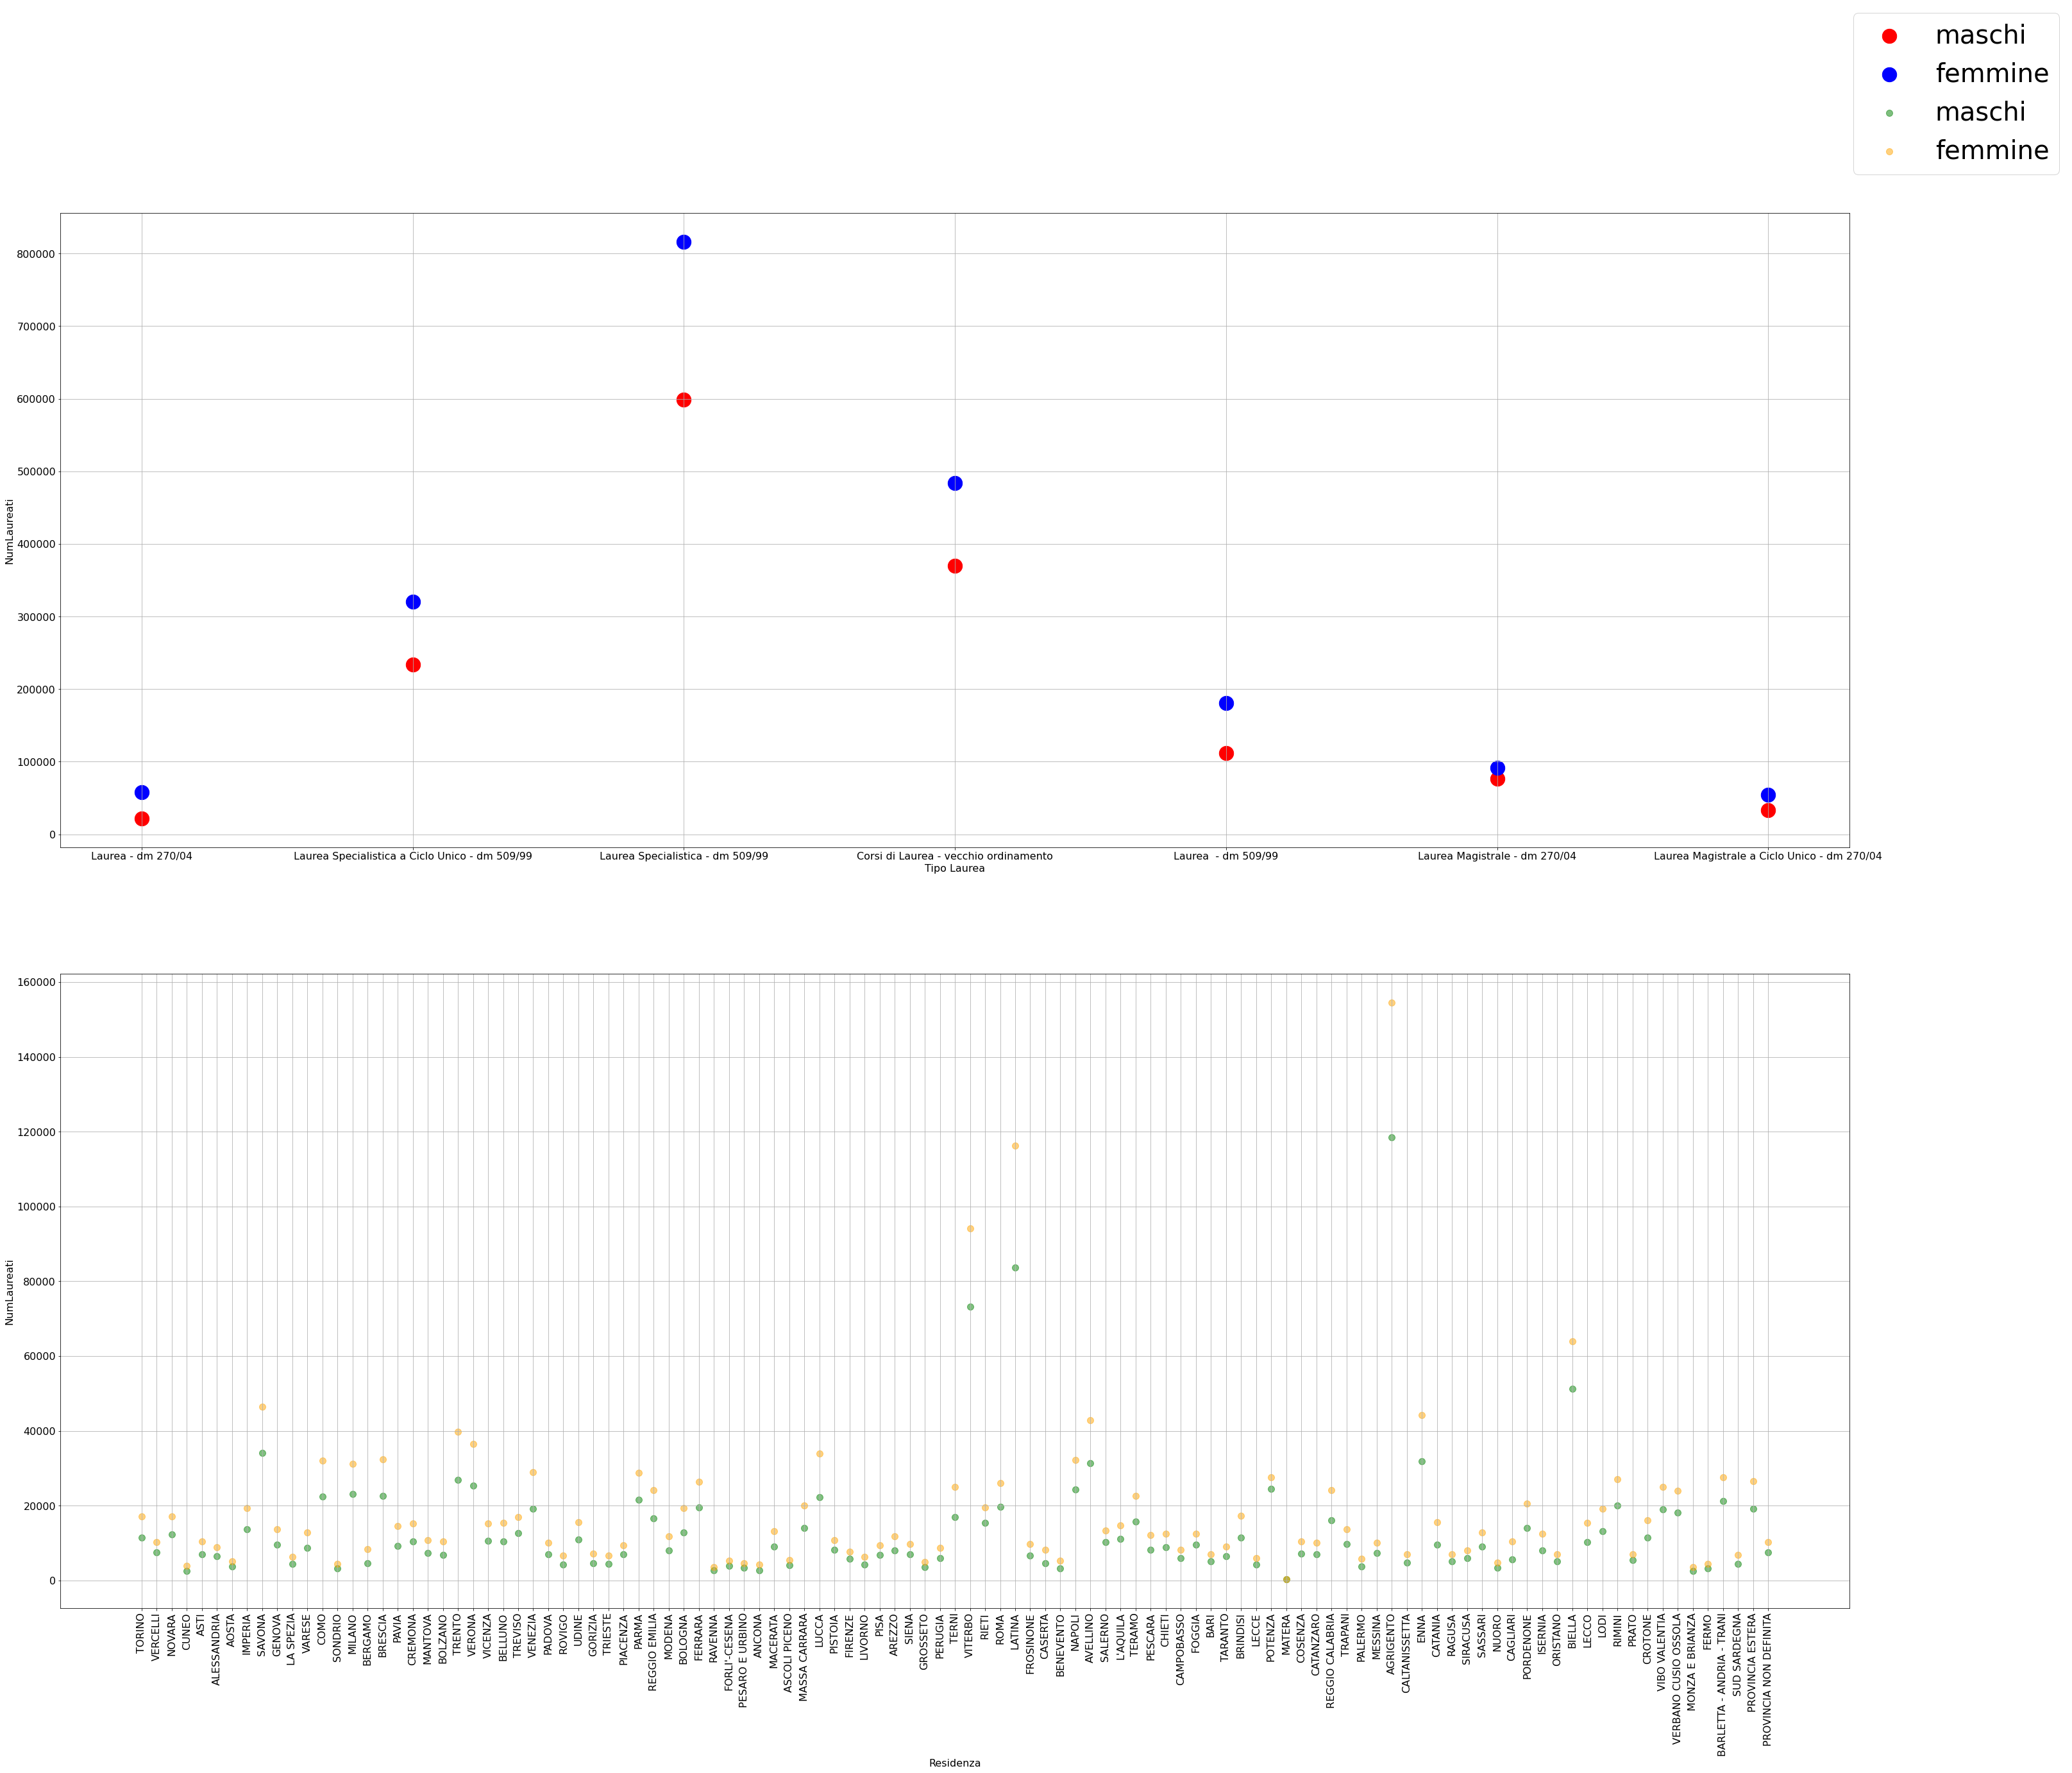

In [27]:
maskC_m=lauxtco["SESSO"]=="M"
maskC_f=lauxtco["SESSO"]=="F"

fig, axs = plt.subplots(2, 1, figsize=(50,40))
plt.xticks(rotation=90)

axs[0].scatter(lauxtco["CorsoTIPO"].unique(), lauxtco[["CorsoTIPO","Lau"]][maskC_m].groupby("CorsoTIPO").sum(),
            c="r",label="maschi",s=500)
axs[0].scatter(lauxtco["CorsoTIPO"].unique(), lauxtco[["CorsoTIPO","Lau"]][maskC_f].groupby("CorsoTIPO").sum(),
            c="b",label="femmine",s=500)
axs[0].set_xlabel("Tipo Laurea", fontsize=16)
axs[0].set_ylabel("NumLaureati", fontsize=16)
axs[0].tick_params(axis="x", labelsize=16)
axs[0].tick_params(axis="y", labelsize=16)
axs[0].grid()


maskR_m=lauxres["SESSO"]=="M"
maskR_f=lauxres["SESSO"]=="F"

axs[1].scatter(lauxres["ResidenzaP"].unique(), lauxres[["ResidenzaP","Lau"]][maskR_m].groupby("ResidenzaP").sum(),
            c="g",label="maschi",s=100,alpha=0.5)
axs[1].scatter(lauxres["ResidenzaP"].unique(), lauxres[["ResidenzaP","Lau"]][maskR_f].groupby("ResidenzaP").sum(),
            c="orange",label="femmine",s=100,alpha=0.5)
axs[1].set_xlabel("Residenza", fontsize=16)
axs[1].set_ylabel("NumLaureati", fontsize=16)
axs[1].tick_params(axis="x", labelsize=16)
axs[1].tick_params(axis="y", labelsize=16)
axs[1].grid()
fig.legend(fontsize=40)

plt.show()

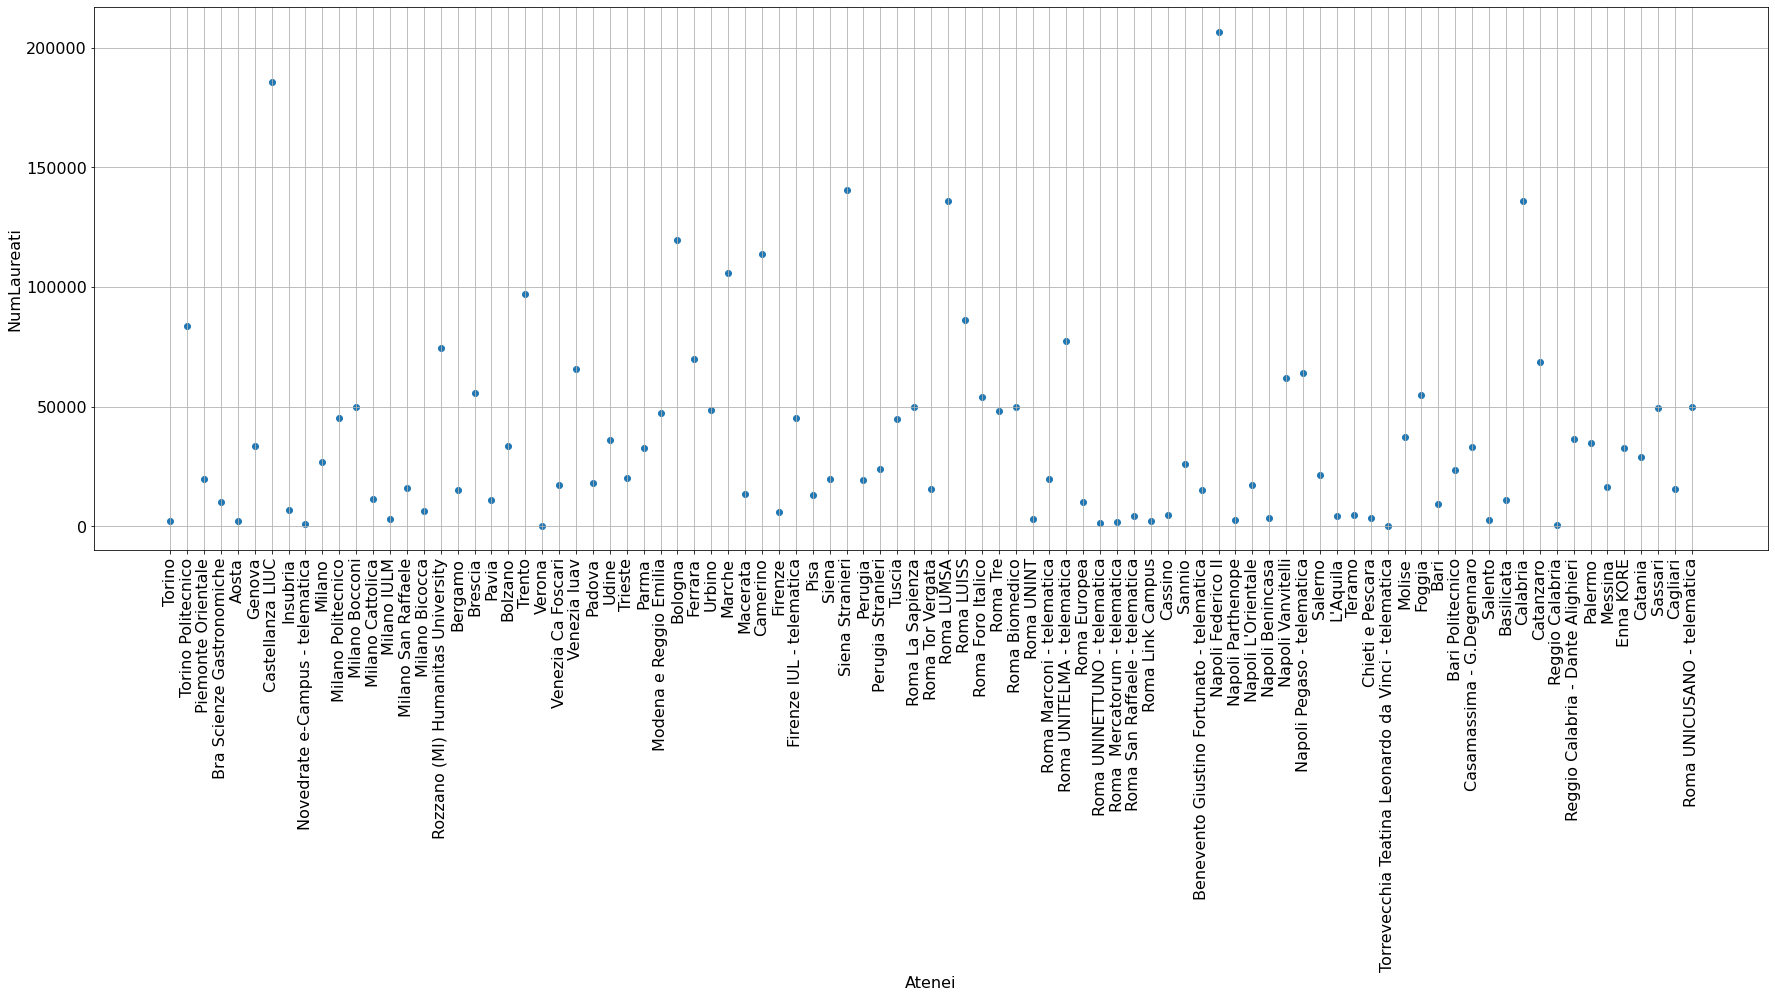

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
ax.scatter(lauxate["AteneoNOME"].unique(), lauxate[["AteneoNOME","Lau"]].groupby("AteneoNOME").sum())
ax.set_xlabel("Atenei", fontsize=16, )
ax.set_ylabel("NumLaureati", fontsize=16)
plt.xticks(rotation=90)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.grid()

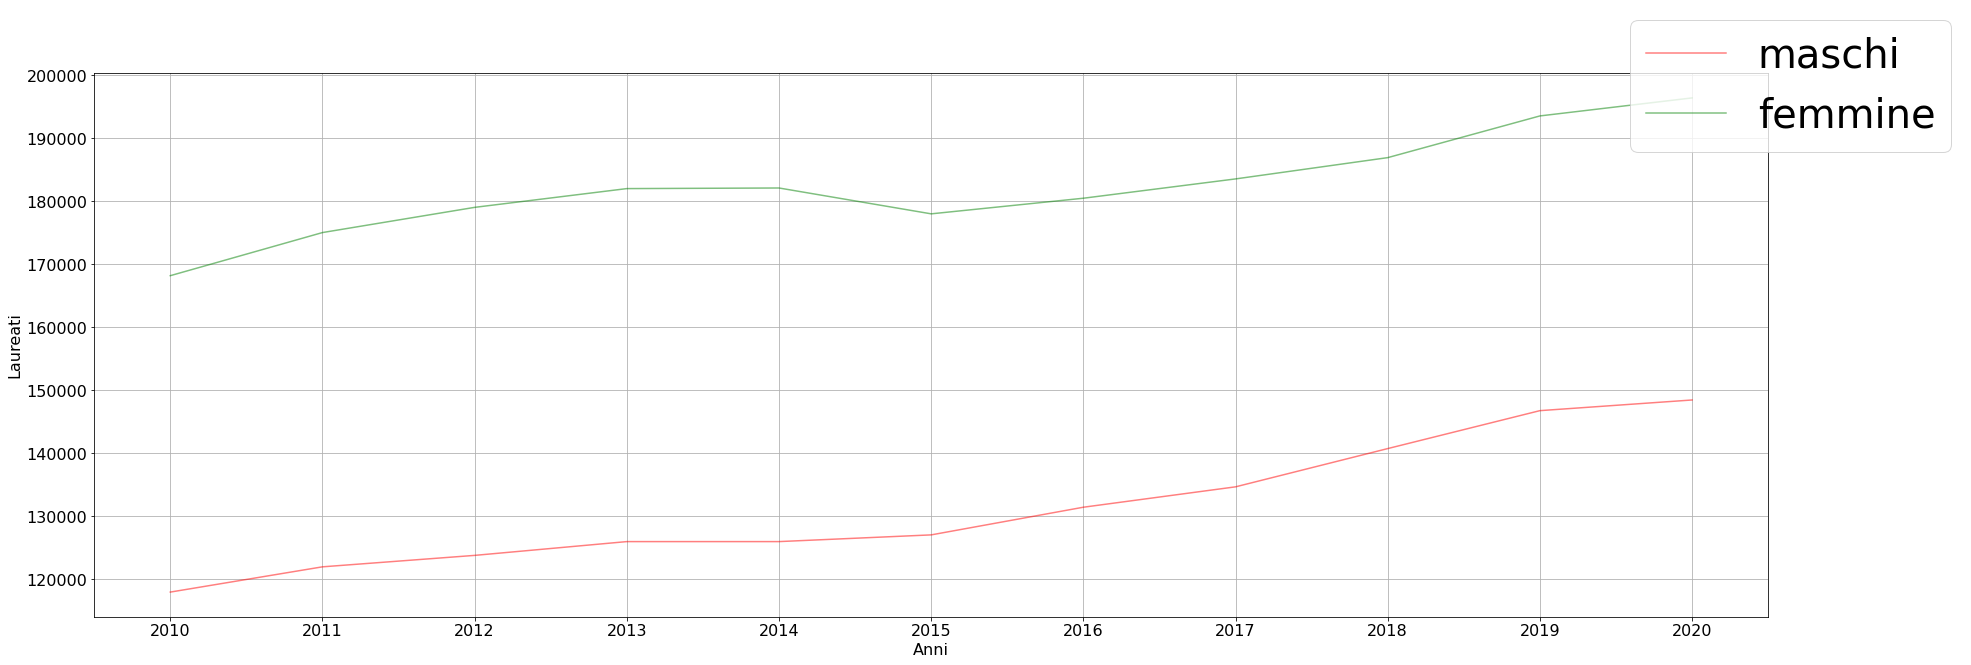

In [15]:
maschera_m=lauxate["SESSO"]=="M"
maschera_f=lauxate["SESSO"]=="F"
fig, axs = plt.subplots(figsize=(30,10))
axs.set_xticks(x)
axs.plot(lauxate[["AnnoS","Lau"]][maschera_m].groupby("AnnoS").sum(),
        c="r", label="maschi", alpha=0.5)
axs.plot(lauxate[["AnnoS","Lau"]][maschera_f].groupby("AnnoS").sum(),
        c="g", label="femmine", alpha=0.5)
axs.set_xlabel("Anni", fontsize=16)
axs.set_ylabel("Laureati", fontsize=16)
axs.tick_params(axis="x", labelsize=16)
axs.tick_params(axis="y", labelsize=16)
fig.legend(fontsize=40)
axs.grid()